### Runge Kutta Method to solve coupled differential


# We will solve for simple harmonic oscillator!

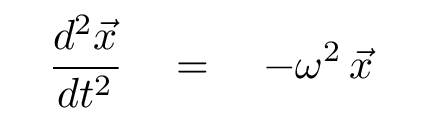

# dx/dt=v
# dv/dt=-x

we have to intialise two initial values. we can take x[0] as position and x[1] as velocity.
So, we have to solve for x[1] (velocity first, then solve for x[0] (i.e position)
WE will return two values from the function. one is dxdt and dvdt

In [1]:
# keras: Sequential is the neural-network class, Dense is
# the standard network layer
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import optimizers # to choose more advanced optimizers like 'adam'

import numpy as np

import matplotlib.pyplot as plt # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display

# for subplots within subplots:
from matplotlib import gridspec

# for nice inset colorbars: (approach changed from lecture 1 'Visualization' notebook)
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

# for updating display
# (very simple animation)
from IPython.display import clear_output
from time import sleep

In [2]:
# Runge Kutte Step

def runge_kutta_step(xo,func,h):
  k1 = func(xo)
  k2 = func(xo + k1 * h * 0.5)
  k3 = func(xo + k2 * h * 0.5)
  k4 = func(xo + k3 * h)
  return((h/ 6.0)*(k1 + 2.0 * k2 + 2.0 * k3 + k4))

"""
Now we will solve the differenatial equation dx/dt=func(x) for n steps up to time T,
with initial value x(t=0)=x0 or x(t0)=x0.
"""
def solve(x0,func,T,n):
  h = T / n
  ts = [0]
  xs = np.zeros(np.shape(x0)+(n,))
  #print("intialize xs with intial values ",xs)
  x=np.array(x0,dtype='float')
  #print("x : ",x)
  for j in range(n):
        #print("for j = " , j)
        x += runge_kutta_step(x, func, h)
        xs[...,j]=x
        #print("x is ",x)
        #print("xs is ",xs)
  ts=h*(np.array(range(n))+1) #all time points
  return ts, xs



In [3]:
def func(X):
  dxdt=X[1] # dx/dt = v
  dvdt=-X[0] #dv/dt =-x
  return np.array([dxdt, dvdt])

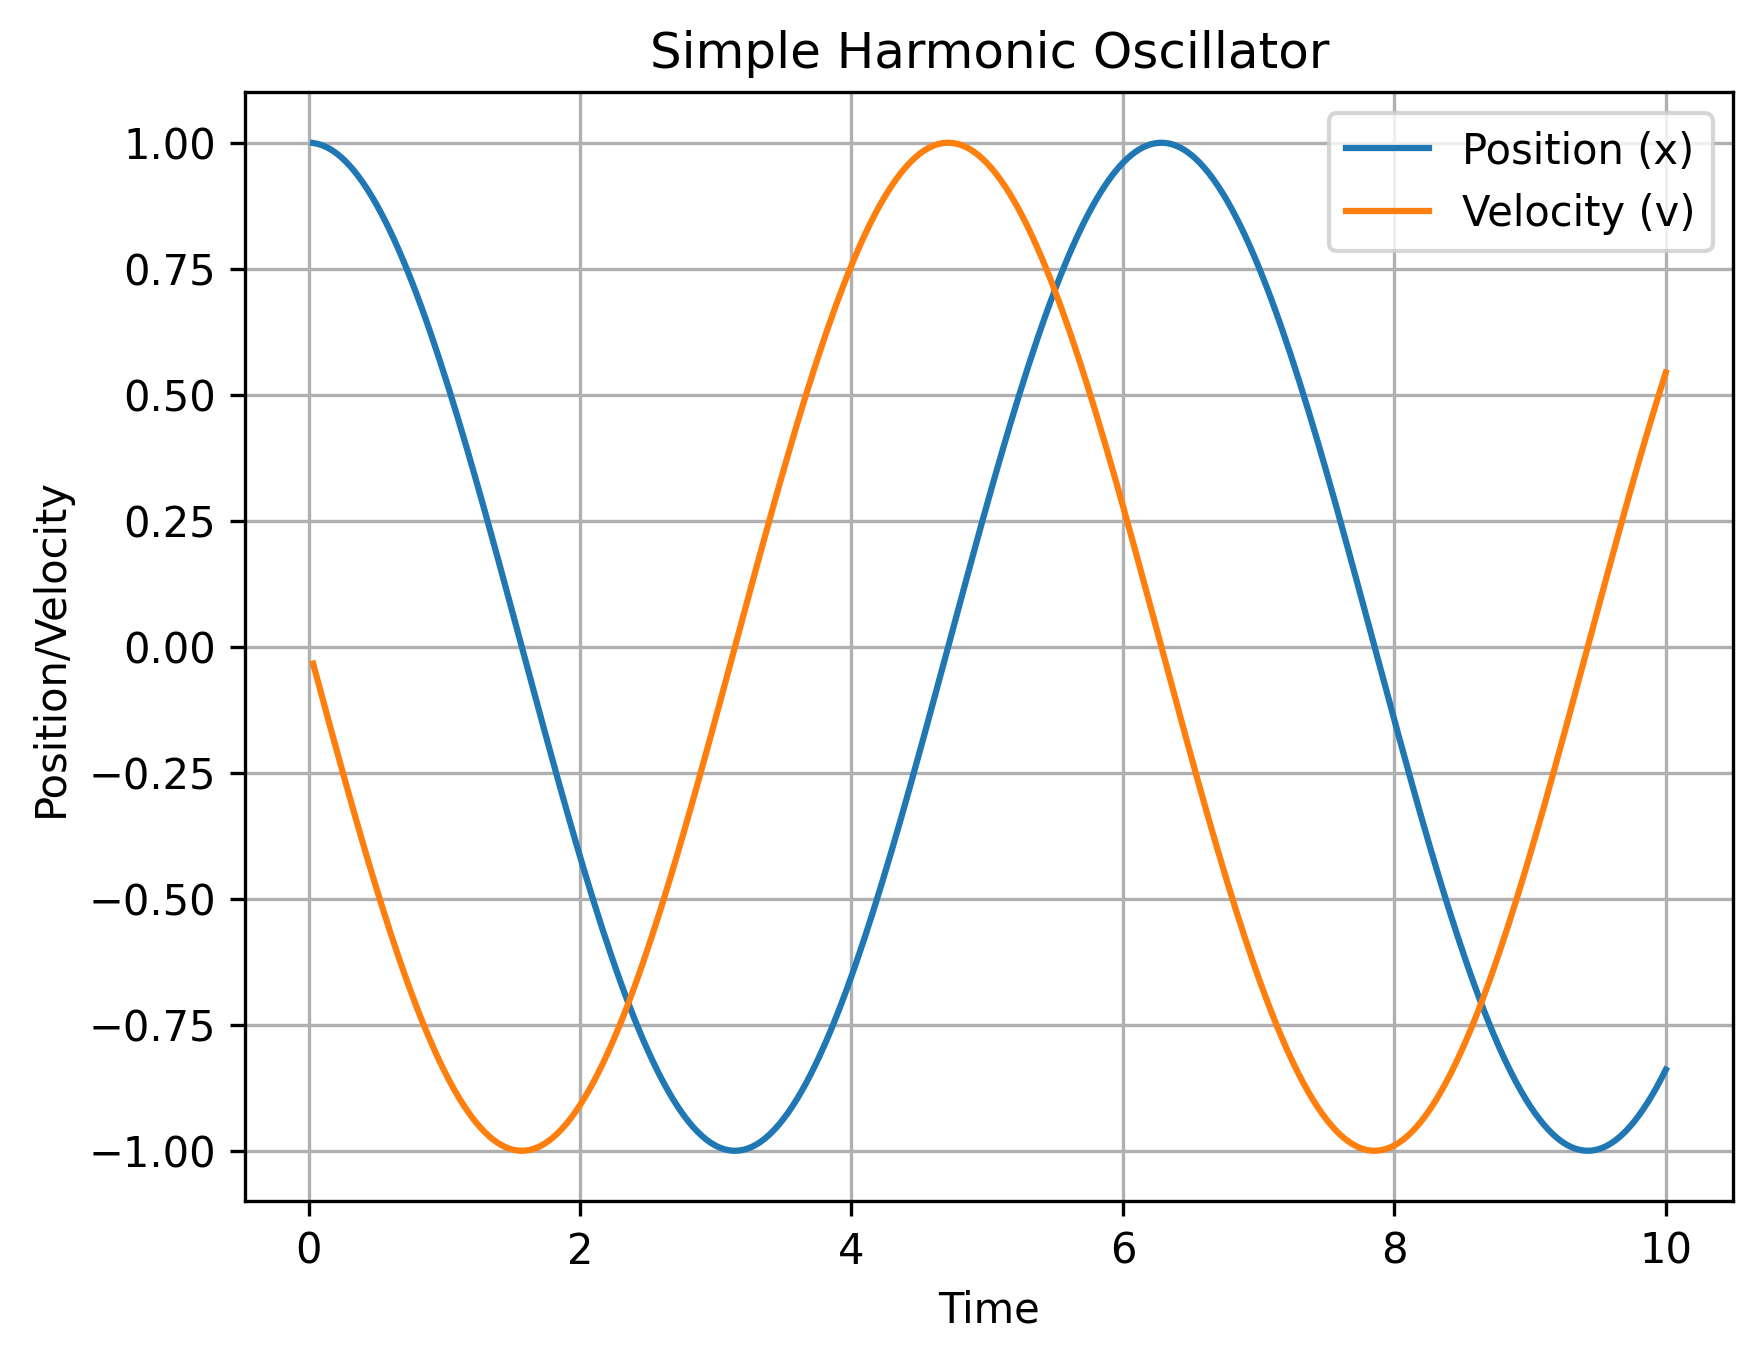

In [4]:
ts,xs=solve(x0=[1,0],func=func,T=10.0,n=300)
plt.plot(ts, xs[0], label='Position (x)')
plt.plot(ts, xs[1], label='Velocity (v)')
plt.xlabel('Time')
plt.ylabel('Position/Velocity')
plt.title('Simple Harmonic Oscillator')
plt.legend()
plt.grid(True)
plt.show()

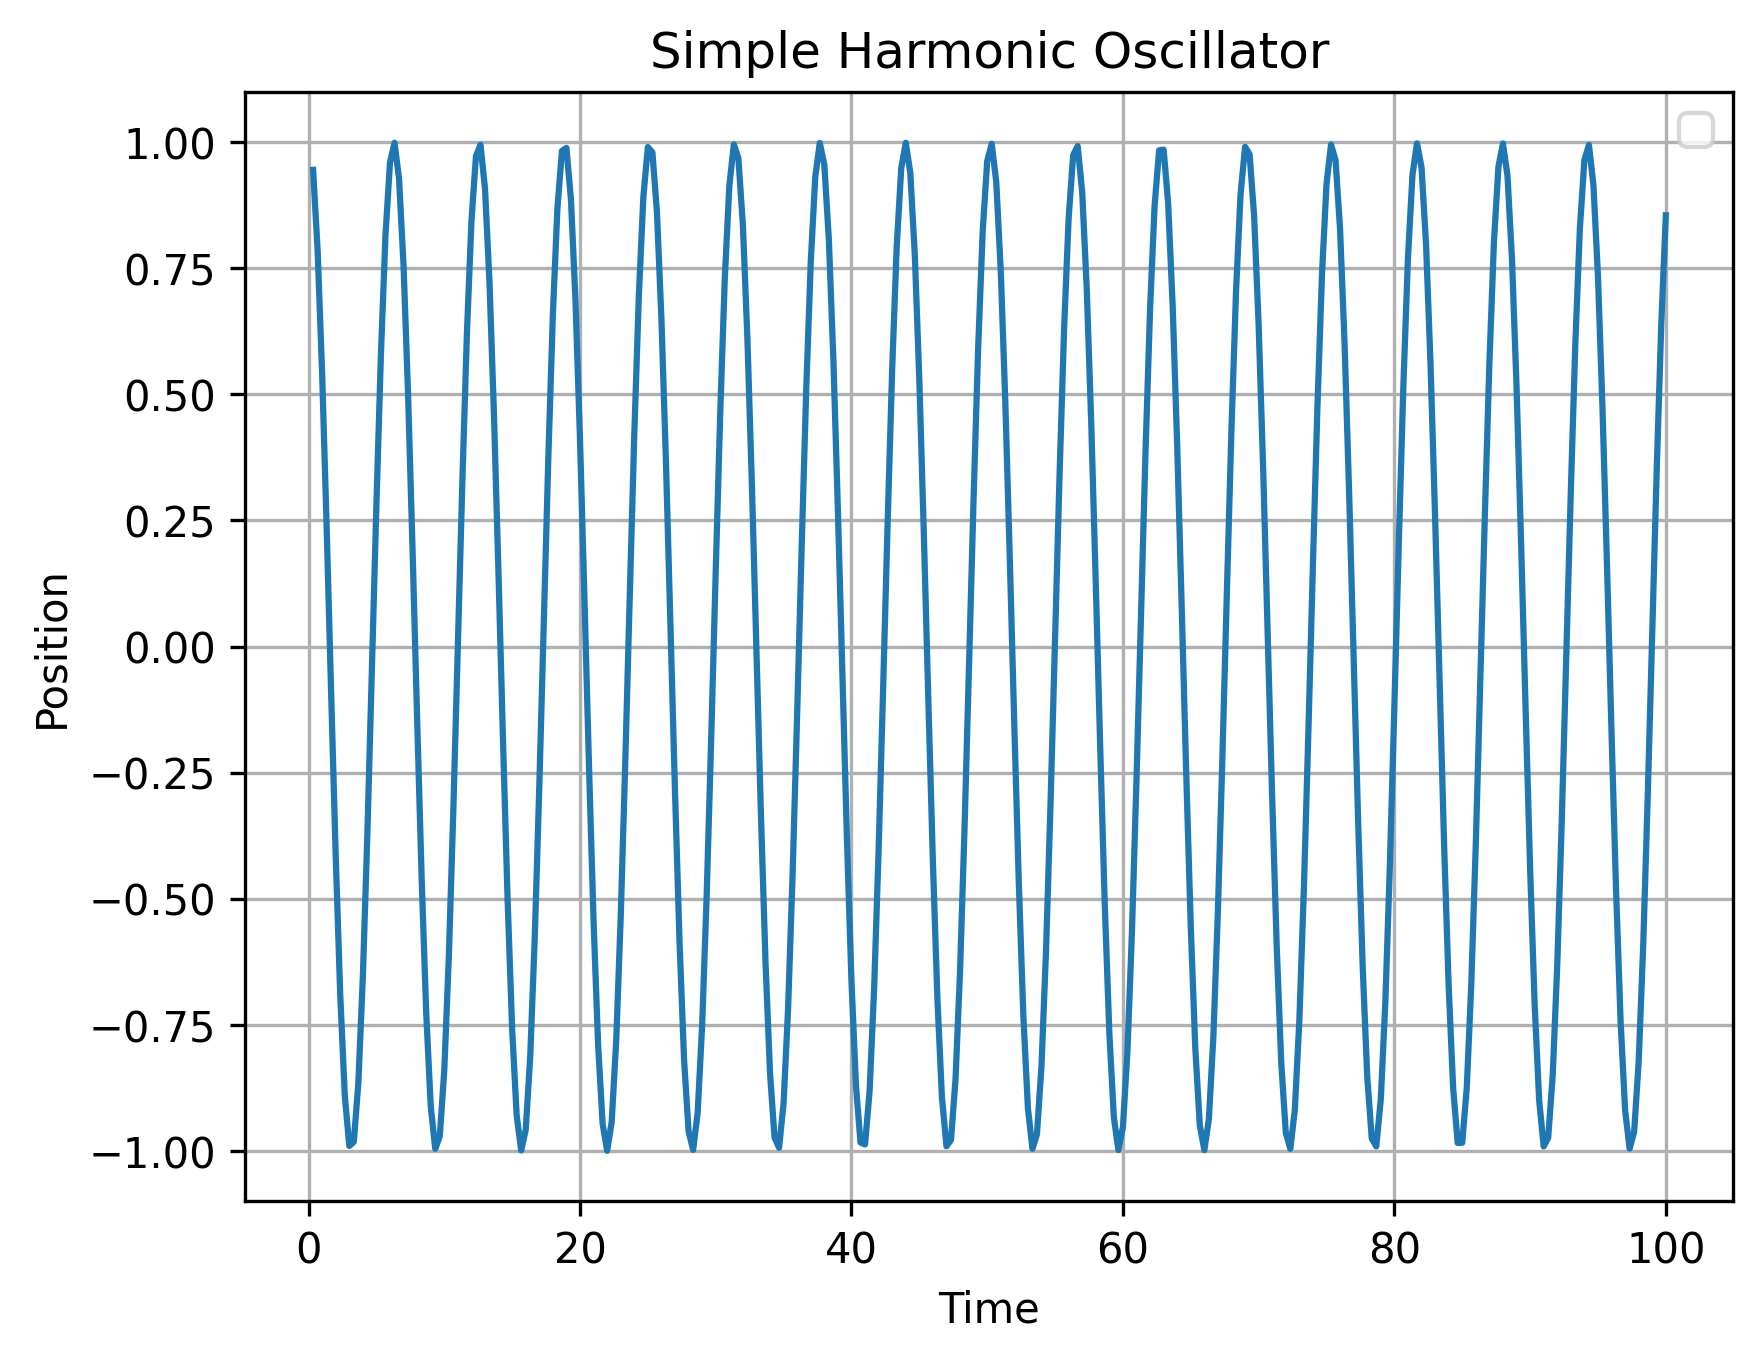

In [5]:
ts,xs=solve(x0=[1,0],func=func,T=100.0,n=300)
plt.plot(ts, xs[0])
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Simple Harmonic Oscillator')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
def func1(x) :

  # X[0,:] are all the coordinates for all particles (Second index)
  # X[1,:] are all the velocities
  global k #the spring constant for two oscillators
  global d #the couling spring constant
  global m #the mass of the two oscillators
  dvdt=np.zeros(2)
  dvdt[0]=-(k[0]/m[0])*x[0,0]-(d/m[0])*(x[0,0]-x[0,1])
  dvdt[1]=-(k[1]/m[1])*x[0,1]-(d/m[1])*(x[0,1]-x[0,0])

  dxdt=x[1,:]

  return np.array([dxdt,dvdt])


[[ 1.35138273 -0.83182641]
 [-1.2592399  -2.06813556]]


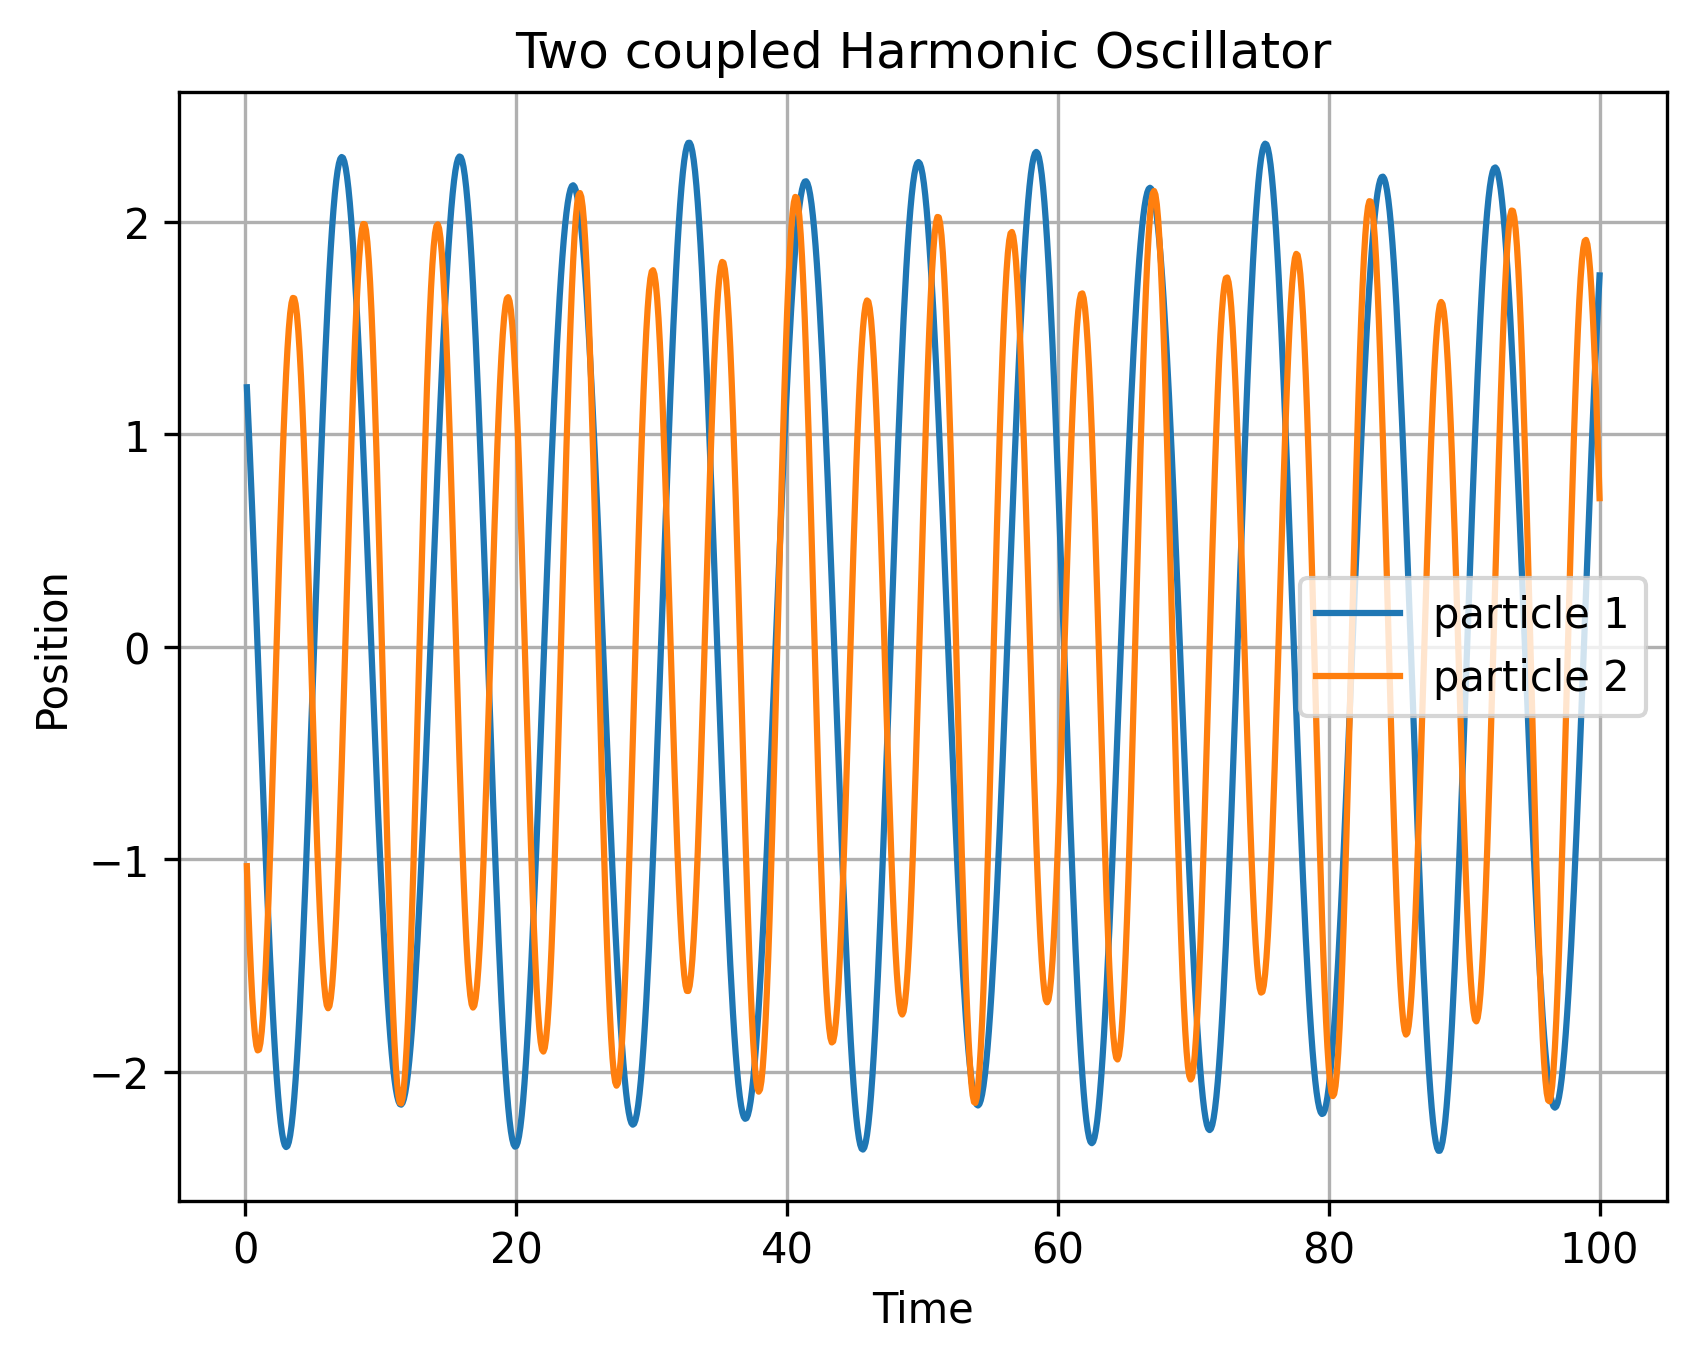

In [7]:
k=np.array([1.0,1.3]) #the spring constants
d=0.1 #coupling between the two masses
m=[2.0,1.0] #the masses

X0=np.random.randn(2,2)
print(X0)
ts,xs=solve(x0=X0,func=func1,T=100.0,n=1000)
plt.plot(ts, xs[0,0], label='particle 1')
plt.plot(ts, xs[0,1], label='particle 2')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Two coupled Harmonic Oscillator')
plt.legend()
plt.grid(True)
plt.show()


The physical example is a 'heavy' particle immersed in a bath of 'light' particles. We are only allowed to observe the motion of the heavy particle, but we want to predict the coordinate of one of the other particles (which are initialized randomly in each run). This can only be done by exploiting memory, using the past observations of the heavy particle's motion, to infer what the others are doing.

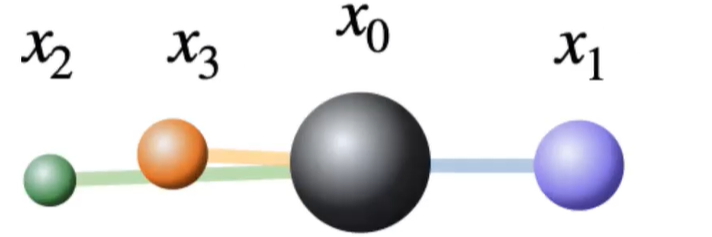

### Now: multiple coupled oscillators

Here all the oscillators j=1,2,3,... are coupled to the one special oscillator j=0:

$$ m_0 {d^2x_0 \over dt^2} = -k_0 x_0 + \sum_{j>0} D_j (x_j-x_0)$$

and (for j>0):

$$ m_j {d^2x_j \over dt^2} = -k_j x_j + D_j (x_0-x_j)$$


1st term is from Newton's law

Rest term from hooke's law

# Let me solve for two oscillators attached to one oscillator!

In [8]:
def func1(x) :

  # X[0,:] are all the coordinates for all particles (Second index)
  # X[1,:] are all the velocities
  global k #the spring constant for two oscillators
  global d #the couling spring constant
  global m #the mass of the two oscillators
  dvdt=np.zeros(3)
  dvdt[0]=-(k[0]/m[0])*x[0,0]-(d/m[0])*(x[0,0]-x[0,1])-(d/m[0])*(x[0,0]-x[0,2])
  dvdt[1]=-(k[1]/m[1])*x[0,1]-(d/m[1])*(x[0,1]-x[0,0])
  dvdt[2]=-(k[2]/m[2])*x[0,2]-(d/m[2])*(x[0,2]-x[0,0])

  dxdt=x[1,:]

  return np.array([dxdt,dvdt])

[[-0.81036846 -2.7181088   1.38910895]
 [ 2.59771627  1.41471675 -1.96938334]]


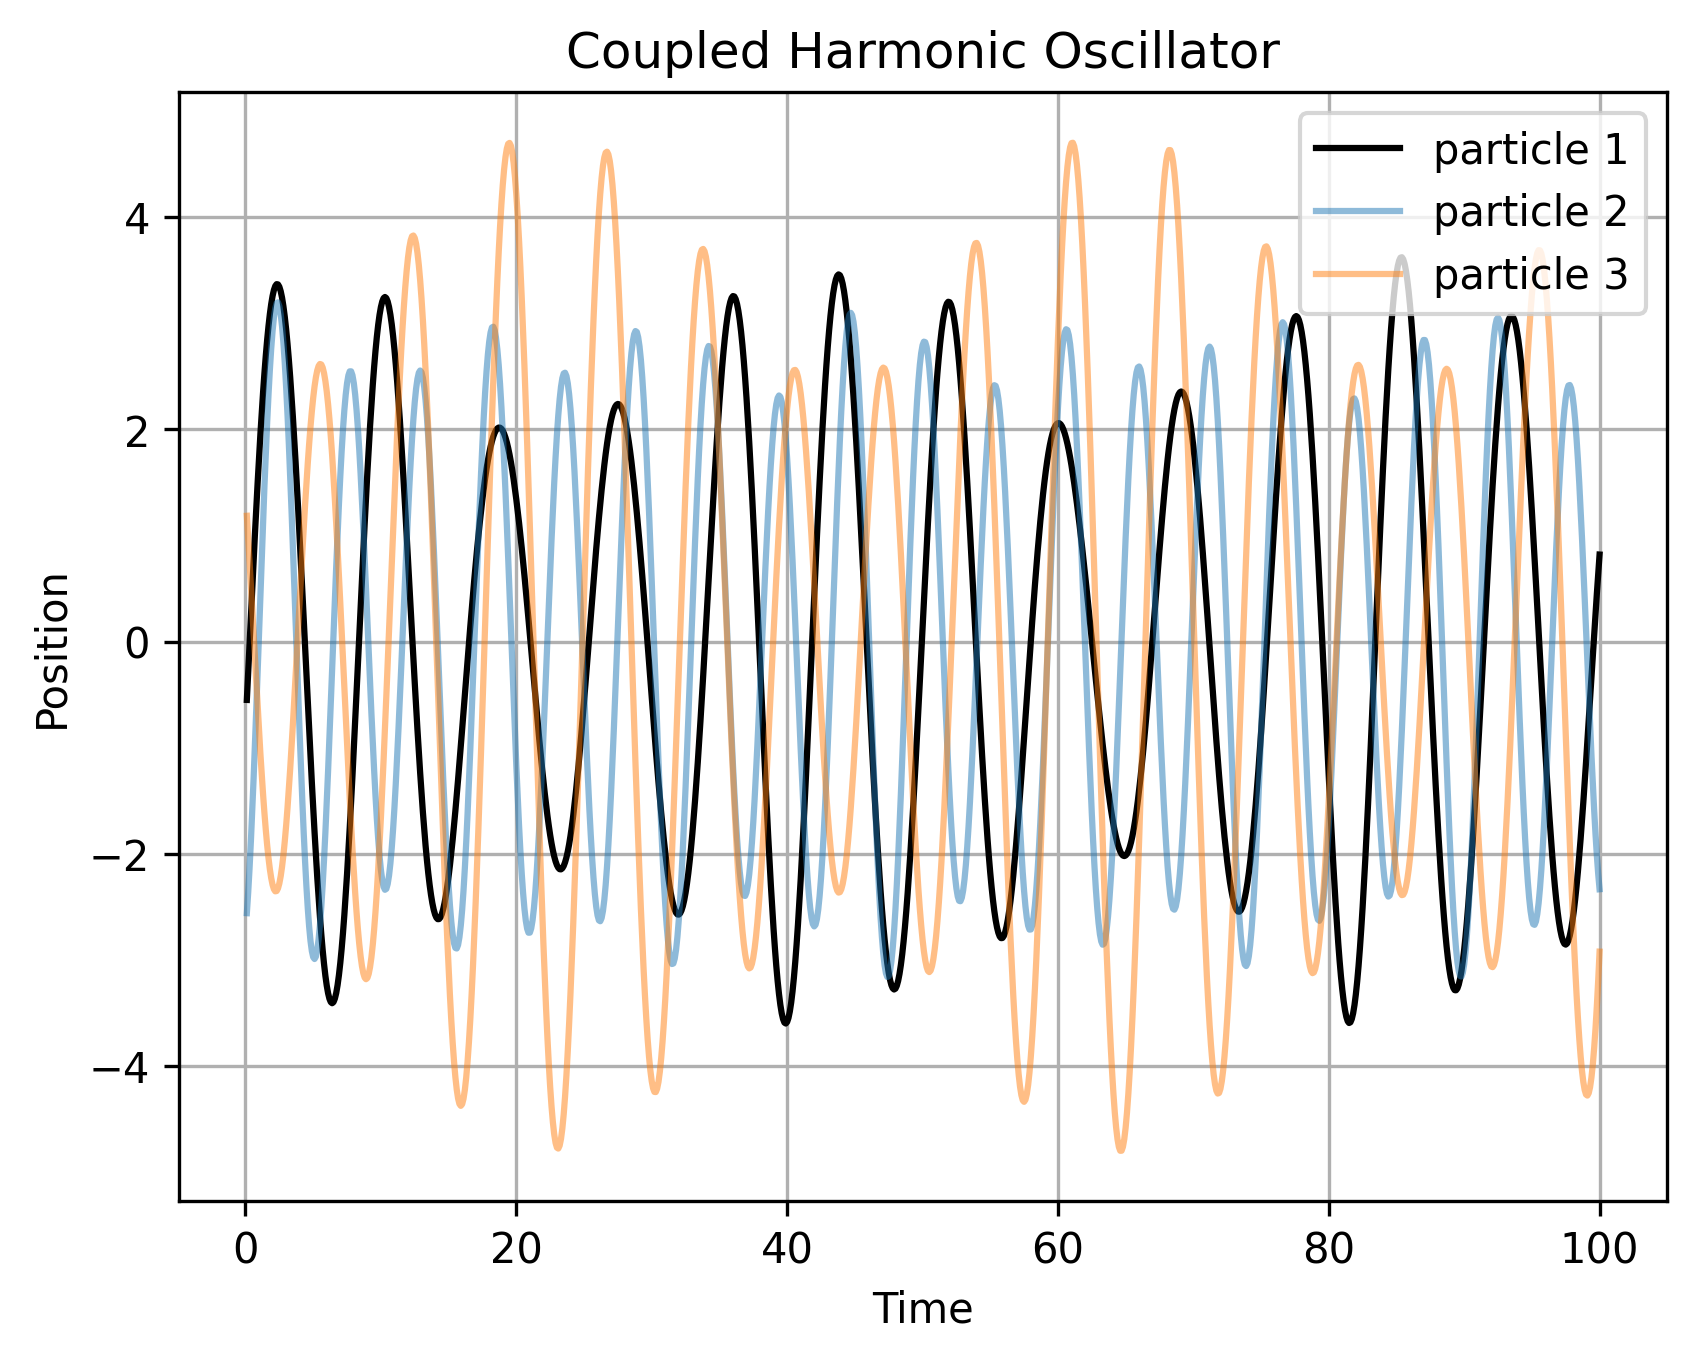

In [9]:
k=np.array([1.0,1.3,0.7]) #the spring constants
d=0.1 #coupling between the masses
m=[2.0,1.0,1.0] #the masses

X0=np.random.randn(2,3)
print(X0)
ts,xs=solve(x0=X0,func=func1,T=100.0,n=1000)
plt.plot(ts, xs[0,0], label='particle 1',color='black',alpha=1) #our 'heavy' particle
plt.plot(ts, xs[0,1], label='particle 2',alpha=0.5)
plt.plot(ts, xs[0,2], label='particle 3',alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Coupled Harmonic Oscillator')
plt.legend()
plt.grid(True)
plt.show()

# Multiple coupled oscillators, batch processing (many trajectories in parallel!)

We simply add a third index to x, which is now an array of shape[2,particle_number,batchsize]
The usual array gymnastics are required to make it work

1st let me make a genralise form for 3 particles!

In [10]:
def func1(x) :

  # X[0,:] are all the coordinates for all particles (Second index)
  # X[1,:] are all the velocities
  global k #the spring constant for two oscillators
  global d #the couling spring constant
  global m #the mass of the two oscillators
  dvdt=np.zeros(3)
  print(dvdt)
  print("XXXXX")
  coupling_acc=np.zeros(3)
  print(coupling_acc)
  coupling_acc=(d/m)*(x[0,:]-x[0,0])
  coupling_acc[0]=(d[0]/m[0])*np.sum(x[0,0]-x[0,:])
  coupling_acc=(d/m)*(x[0,:]-x[0,0])
  dvdt=-(k/m)*x[0,:]-coupling_acc
  dxdt=x[1,:]

  return np.array([dxdt,dvdt])

In [14]:
def multiple_coupled_oscillators_rhs(X):
    # X[0,:] are all the coordinates for all particles (second index)
    # X[1,:] are all the velocities
    global k # the spring constants for all the oscillators (array)
    global D # coupling spring constant (array)
    global m # the masses (array)

    # all the terms for the oscillators j=1,2,3,... being affected by j=0:
    coupling_acc=(D/m)*(X[0,:]-X[0,0])
    # and now the force acting on j=0, from all the others:
    coupling_acc[0]=(D/m[0])*np.sum(X[0,0]-X[0,:])


    return(np.array(
        [
            X[1,:], # dx/dt=v
            -(k/m)*X[0,:]-coupling_acc # dv/dt=force/mass
        ]
    ))

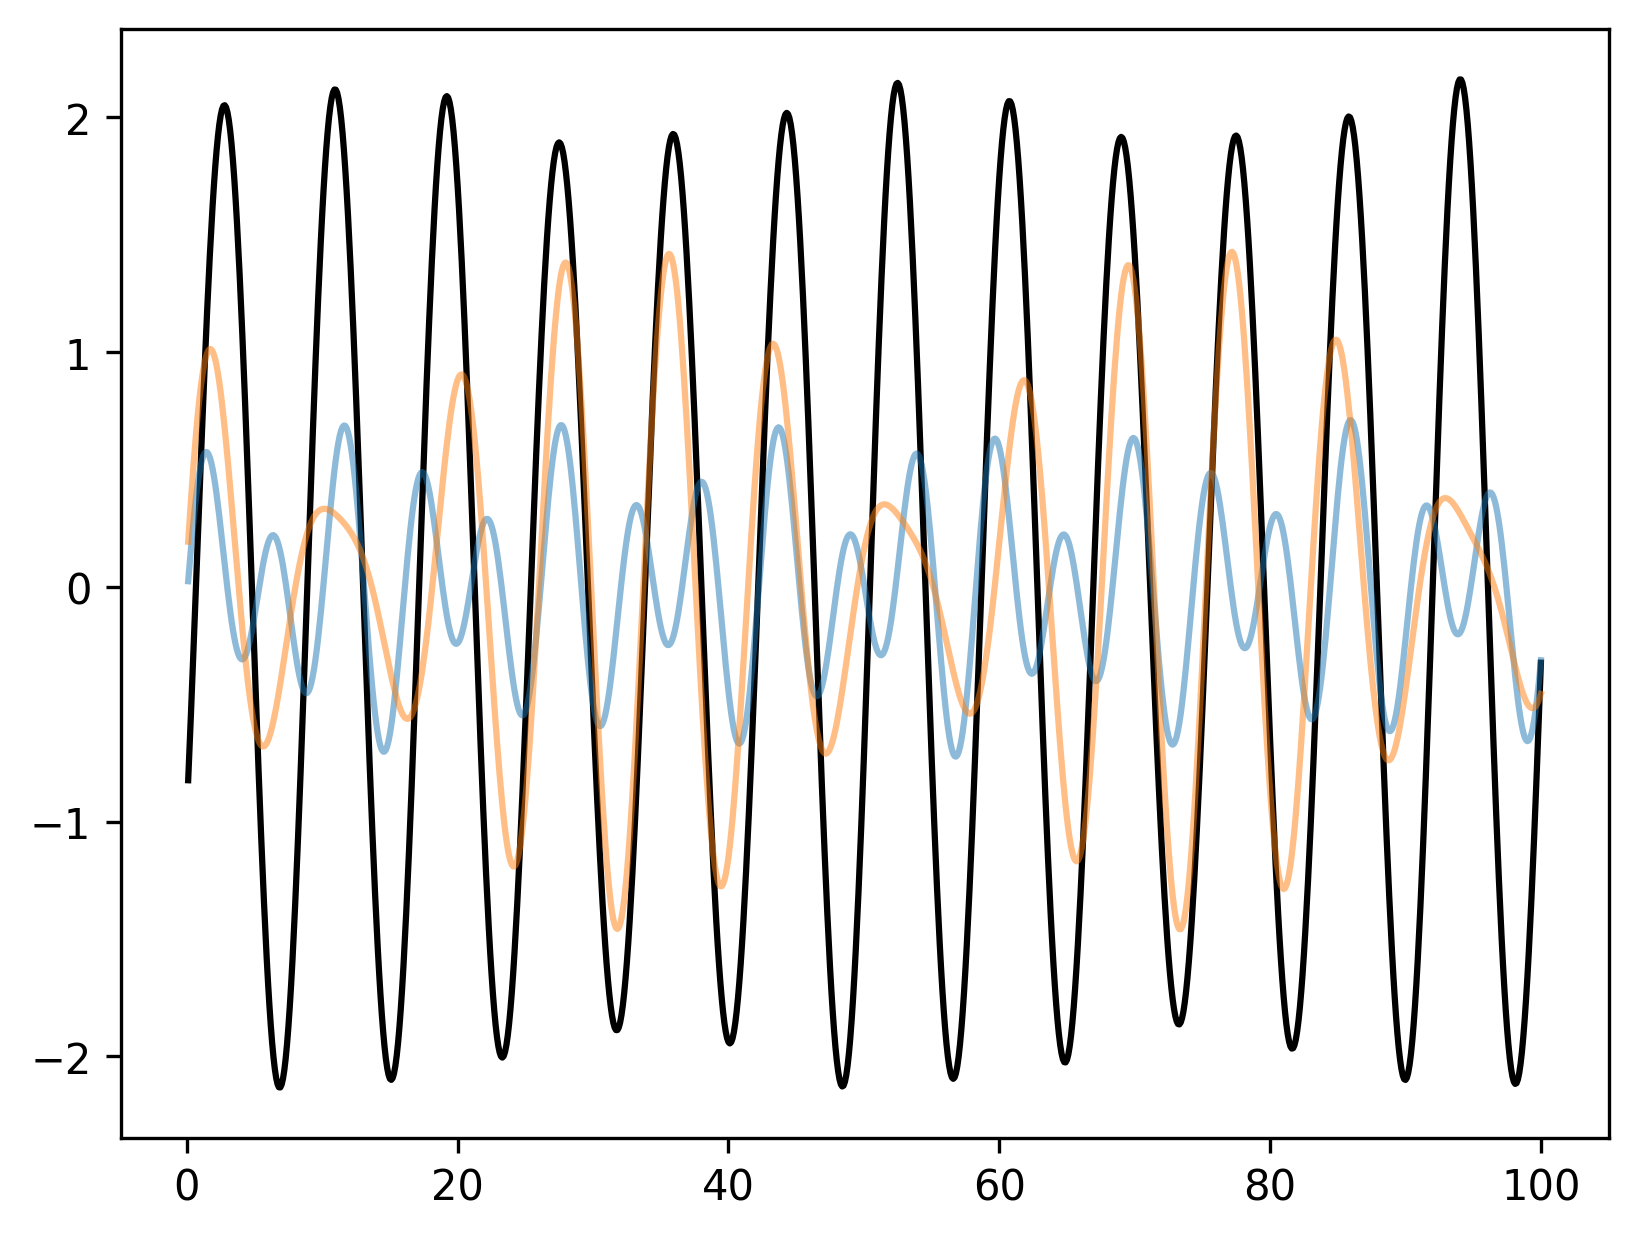

In [15]:
k=np.array([1.0,1.3,0.7]) # the spring constants
D=0.1 # the coupling between j=0 and the rest
m=np.array([2.0,1.0,1.0]) # the masses

X0=np.random.randn(2,3) # first index: x vs. v / second index: particles
ts,Xs=solve(x0=X0,func=multiple_coupled_oscillators_rhs,T=100.0,n=1000)
for n in range(3):
    if n==0:
        color="black" # our 'heavy' particle!
        alpha=1
    else:
        color=None
        alpha=0.5
    plt.plot(ts,Xs[0,n],color=color,alpha=alpha)
plt.show()

# Batch Processing

In [16]:
def multiple_coupled_oscillators_parallel_rhs(X):
    # X[0,:,:] are all the coordinates for all particles (second index) and all trajectories (third index)
    # X[1,:,:] are all the velocities
    global k # the spring constants for all the oscillators (array)
    global D # coupling spring constant (array)
    global m # the masses (array)

    # all the terms for the oscillators j=1,2,3,... being affected by j=0:
    D_over_m=(D/m)[:,None]
    coupling_acc=D_over_m*(X[0,:,:]-X[0,0,:][None,:])
    # and now the force acting on j=0, from all the others:
    D_over_m0=(D/m[0])[:,None]
    coupling_acc[0]=np.sum(D_over_m0*(X[0,0,:][None,:]-X[0,:,:]),axis=0)

    return(np.array(
        [
            X[1,:,:], # dx/dt=v
            -(k/m)[:,None]*X[0,:,:] - coupling_acc # dv/dt=force/mass
        ]
    ))

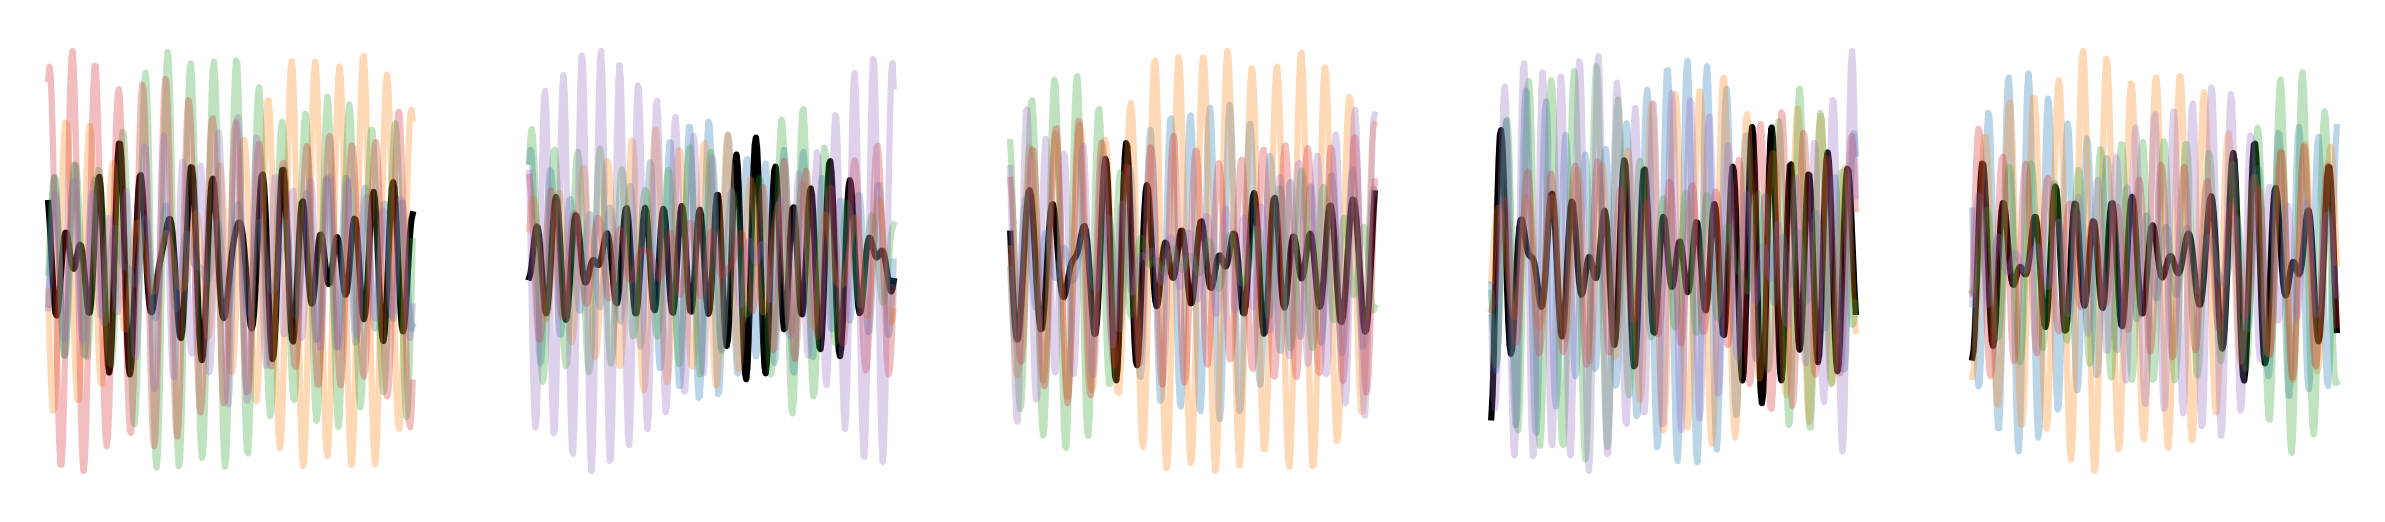

Shape of xs is (2, 6, 5, 300)


In [17]:
number_particles=6
k=np.abs( 0.2*np.random.randn(number_particles)+1.0 ) # the spring constants
D=np.full(number_particles,0.2) # the coupling between j=0 and the rest
m=np.abs( 0.2*np.random.randn(number_particles)+1.0 ) # the masses
m[0]=3.0 # heavy particle
k[0]=3.0 # hard spring: make it still resonant with the rest!

batchsize=5
X0=np.random.randn(2,number_particles,batchsize) # first index: x vs. v / second index: particles / third: batch
ts,Xs=solve(x0=X0,func=multiple_coupled_oscillators_parallel_rhs,T=100.0,n=300)

fig,ax=plt.subplots(ncols=batchsize,nrows=1,figsize=(batchsize*2,2))
for j in range(batchsize):
    for n in range(number_particles):
        if n==0:
            color="black" # our 'heavy' particle!
            alpha=1
        else:
            color=None
            alpha=0.3
        ax[j].plot(ts,Xs[0,n,j],color=color,alpha=alpha)
        ax[j].axis('off')
plt.show()
print("Shape of xs is",Xs.shape)
# 2 represent position and velocity!
# 6 represent number of particles!
# 5 represent batchsize
# 300 represent timesteps

We will now try to predict the motion of particle 1 based purely on the observations of the heavy paricle(number 0)! By observing the full trajectory of the heavy particle, one has to try to infer indirectly what the other particles are up to! This only works with some memory (the current position of the particle 0 is not enough).

# Setting up an LSTM network and training it!

In [18]:
Net=Sequential()

Net.add(LSTM(20,input_shape=(None,1),return_sequences=True))
Net.add(Dense(1,activation="linear"))
Net.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# assuming we can take the solution Xs from above,
# let's see what the network makes of this!
X1=Net.predict_on_batch(Xs[0,0,:,:][:,:,None]) # needs input of shape [batchsize,timesteps,1]

In [20]:
print(np.shape(X1))
# 5 is batchsize
# 300 is timesteps
# 1 pata nhi 3d karane ke liye liya hoga bs
print(np.shape(Xs))
print(np.shape(Xs[0,0,:,:][:,:,None]))

(5, 300, 1)
(2, 6, 5, 300)
(5, 300, 1)


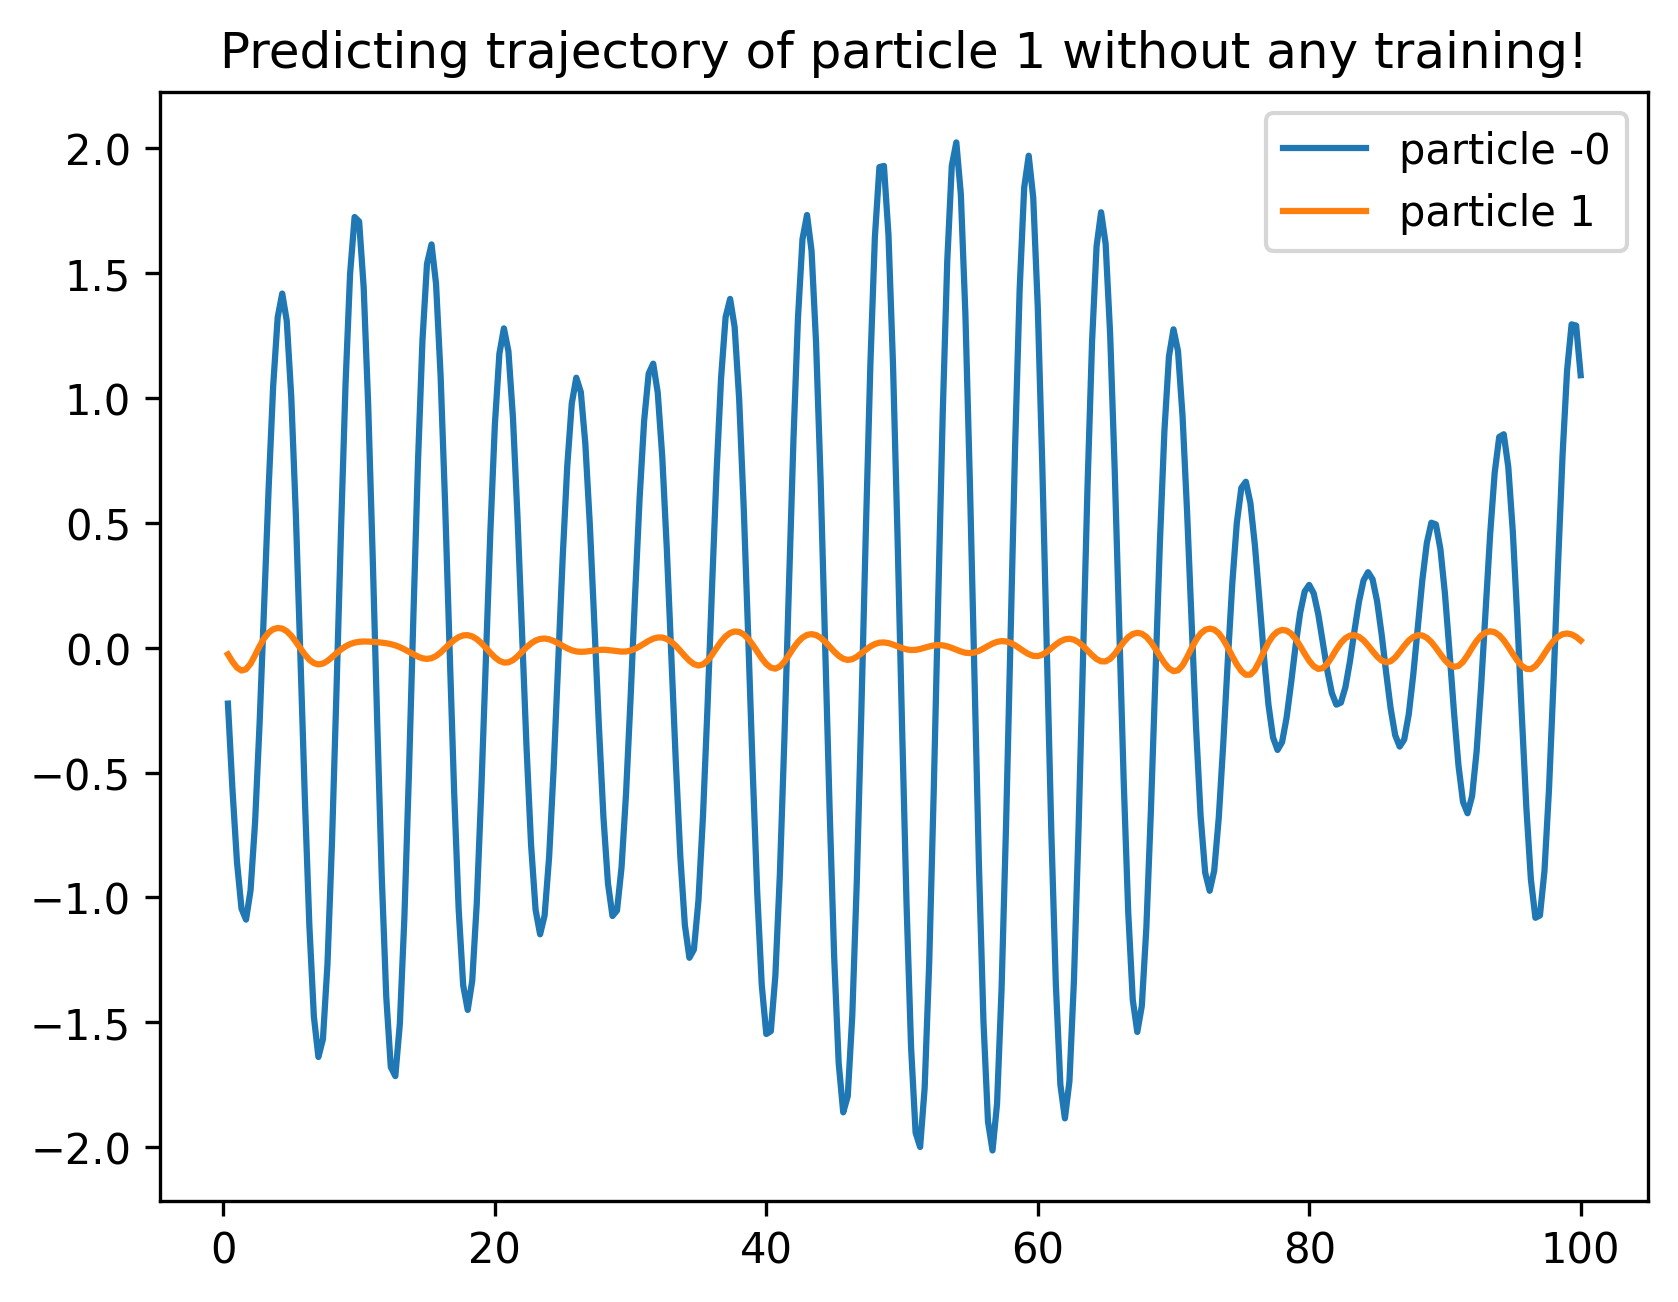

In [21]:
sample=3
plt.plot(ts,Xs[0,1,sample,:], label='particle -0')
plt.plot(ts,X1[sample,:,0],label='particle 1')
plt.title("Predicting trajectory of particle 1 without any training!")
plt.legend()
plt.show()

# Two particles Coupled to each other!

In [22]:
def multiple_coupled_oscillators_parallel_rhs(X):
    # X[0,:,:] are all the coordinates for all particles (second index) and all trajectories (third index)
    # X[1,:,:] are all the velocities
    global k # the spring constants for all the oscillators (array)
    global D # coupling spring constant (array)
    global m # the masses (array)

    # all the terms for the oscillators j=1,2,3,... being affected by j=0:
    D_over_m=(D/m)[:,None]
    coupling_acc=D_over_m*(X[0,:,:]-X[0,0,:][None,:])
    # and now the force acting on j=0, from all the others:
    D_over_m0=(D/m[0])[:,None]
    coupling_acc[0]=np.sum(D_over_m0*(X[0,0,:][None,:]-X[0,:,:]),axis=0)

    return(np.array(
        [
            X[1,:,:], # dx/dt=v
            -(k/m)[:,None]*X[0,:,:] - coupling_acc # dv/dt=force/mass
        ]
    ))

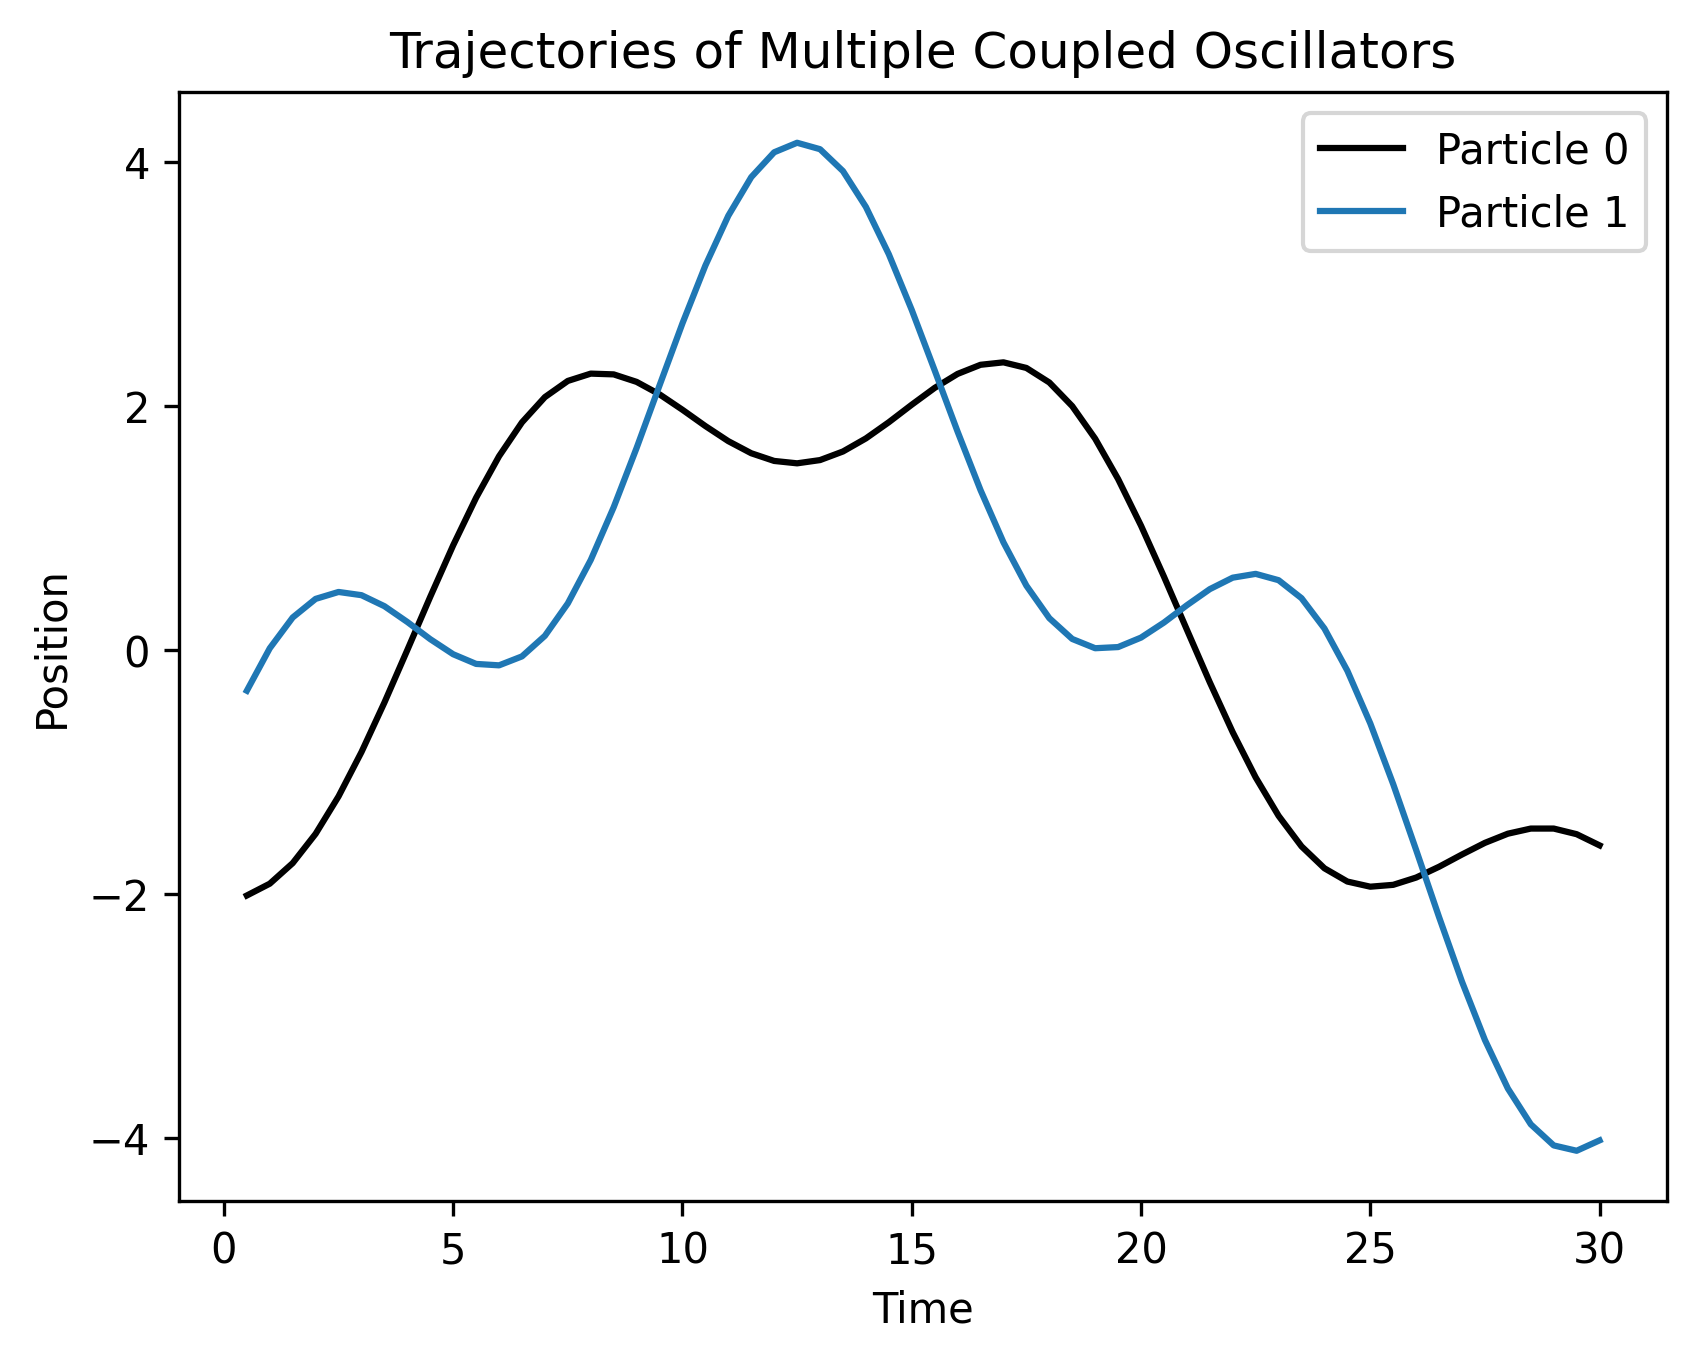

In [23]:
number_particles=2
k=np.array([0.1,0.0])
D=np.array([0.0,0.2])
m=np.array([2.0,1.0])

# create one test trajectory
X0=np.random.randn(2,number_particles,1)
ts,Xs=solve(x0=X0,func=multiple_coupled_oscillators_parallel_rhs,T=30.0,n=60)

# Plot the trajectories
plt.plot(ts, Xs[0, 0, 0], color="black", label="Particle 0")
plt.plot(ts, Xs[0, 1, 0], label="Particle 1")
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Trajectories of Multiple Coupled Oscillators')
plt.legend()
plt.show()

The actual training!

(2, 2, 1, 60)


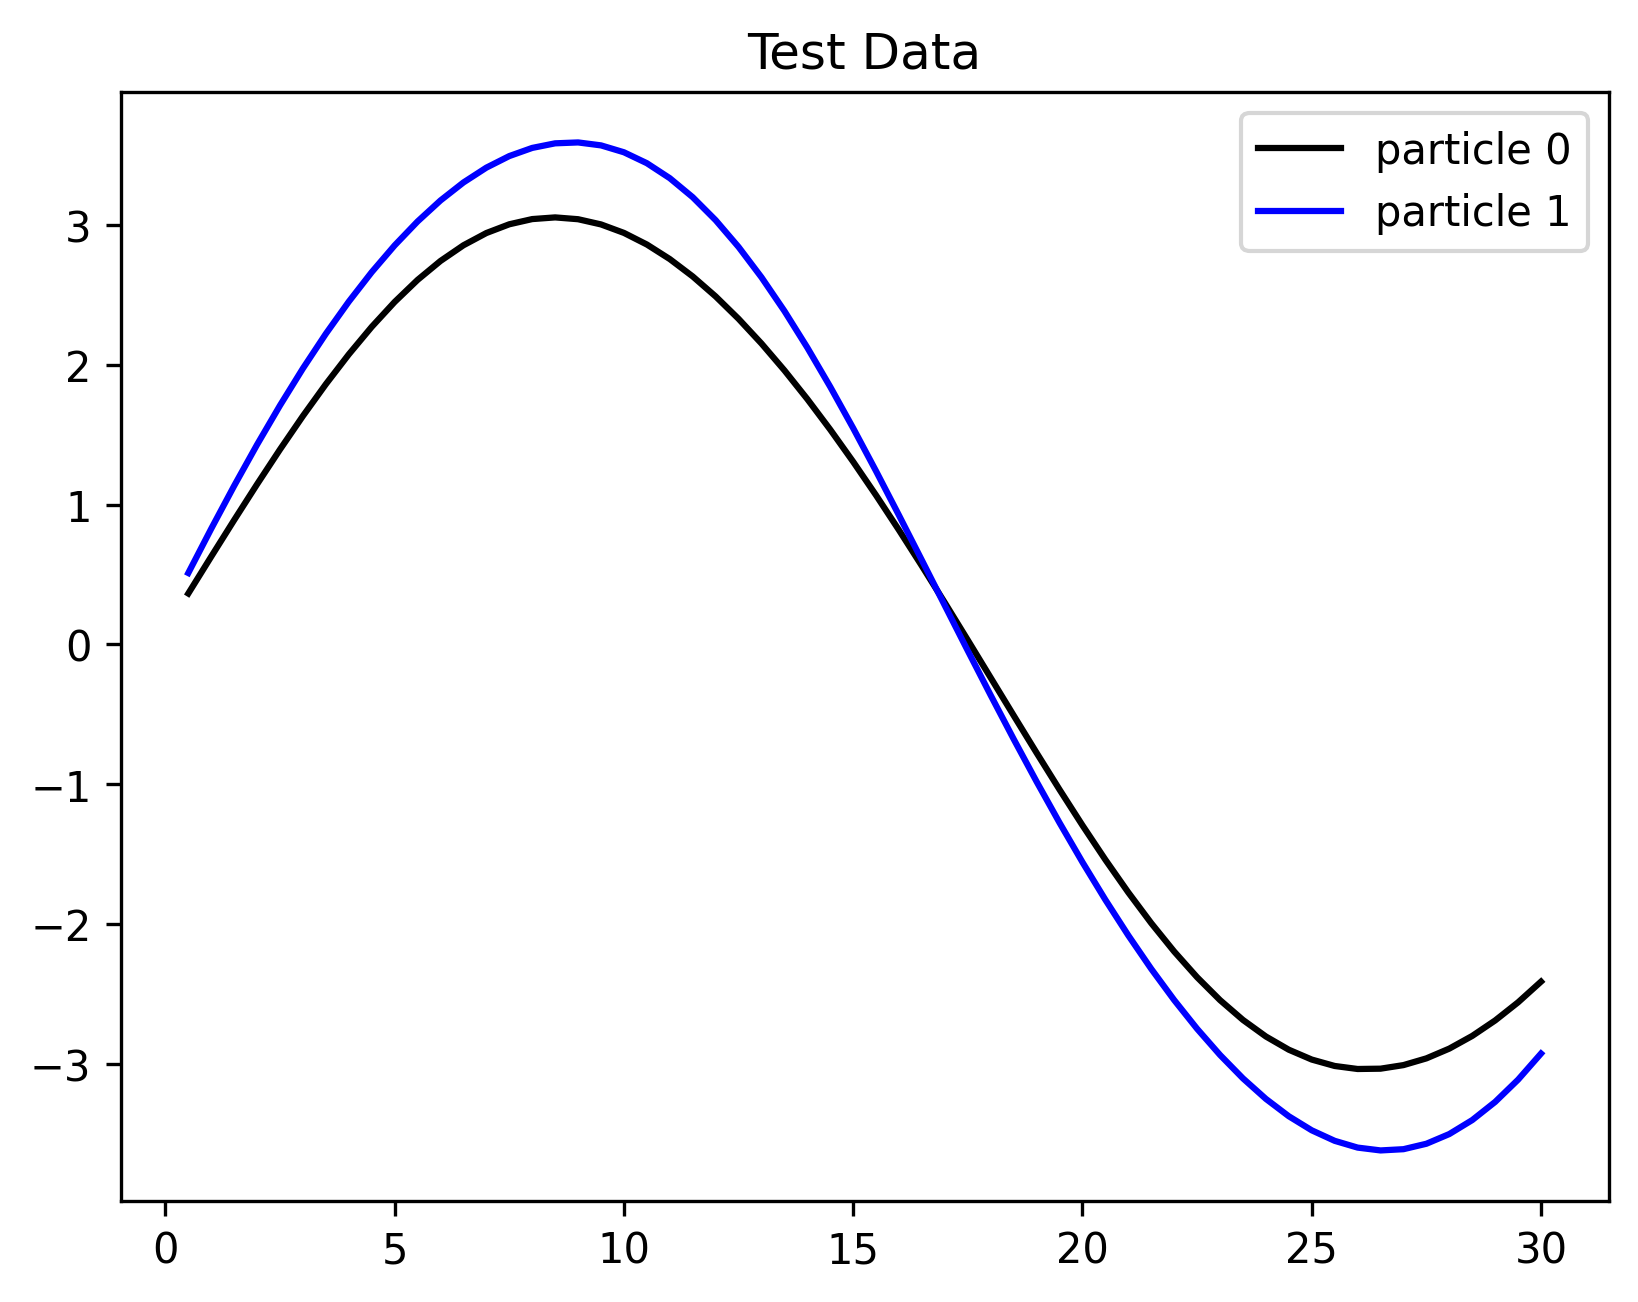

In [24]:
#Lets get test data!
#create one batch of test trajectories to compare against!
X0=np.random.rand(2,number_particles,1)
ts,xs=solve(x0=X0,func=multiple_coupled_oscillators_parallel_rhs,T=30.0,n=60)
print(np.shape(xs))
test_input=xs[0,0,:,:]
test_correct_output=xs[0,1,0,:]
plt.plot(ts,test_input[0,:],color="black",label='particle 0') # particle 0
plt.plot(ts,test_correct_output,color="blue",label='particle 1') # particle 1
plt.title("Test Data")
plt.legend()
plt.show()


In [25]:
# Now lets train
training_steps=1000 #number of training steps
batchsize=50 #batchsize
costs=np.zeros(training_steps)
n=60 #number of time steps
T=30.0 #total time interval

skip_steps=10 #plot every ... skip_steps


for j in range(training_steps):
    X0=np.random.randn(2,number_particles,batchsize) # random initial conditions
    ts,xs=solve(x0=X0,func=multiple_coupled_oscillators_parallel_rhs,T=T,n=n) # get solutions
    costs[j]=Net.train_on_batch(xs[0,0,:,:][:,:,None],xs[0,1,:,:][:,:,None]) # train x_0(t)->x_1(t) mapping

print(np.shape(xs))
print(np.shape(xs[0,0,:,:][:,:,None]))
x=np.linspace(0,1000,1000)
plt.plot(x,costs)

KeyboardInterrupt: 

In [ ]:
print(np.shape(test_input))
print(np.shape(xs[0,0,:,:]))

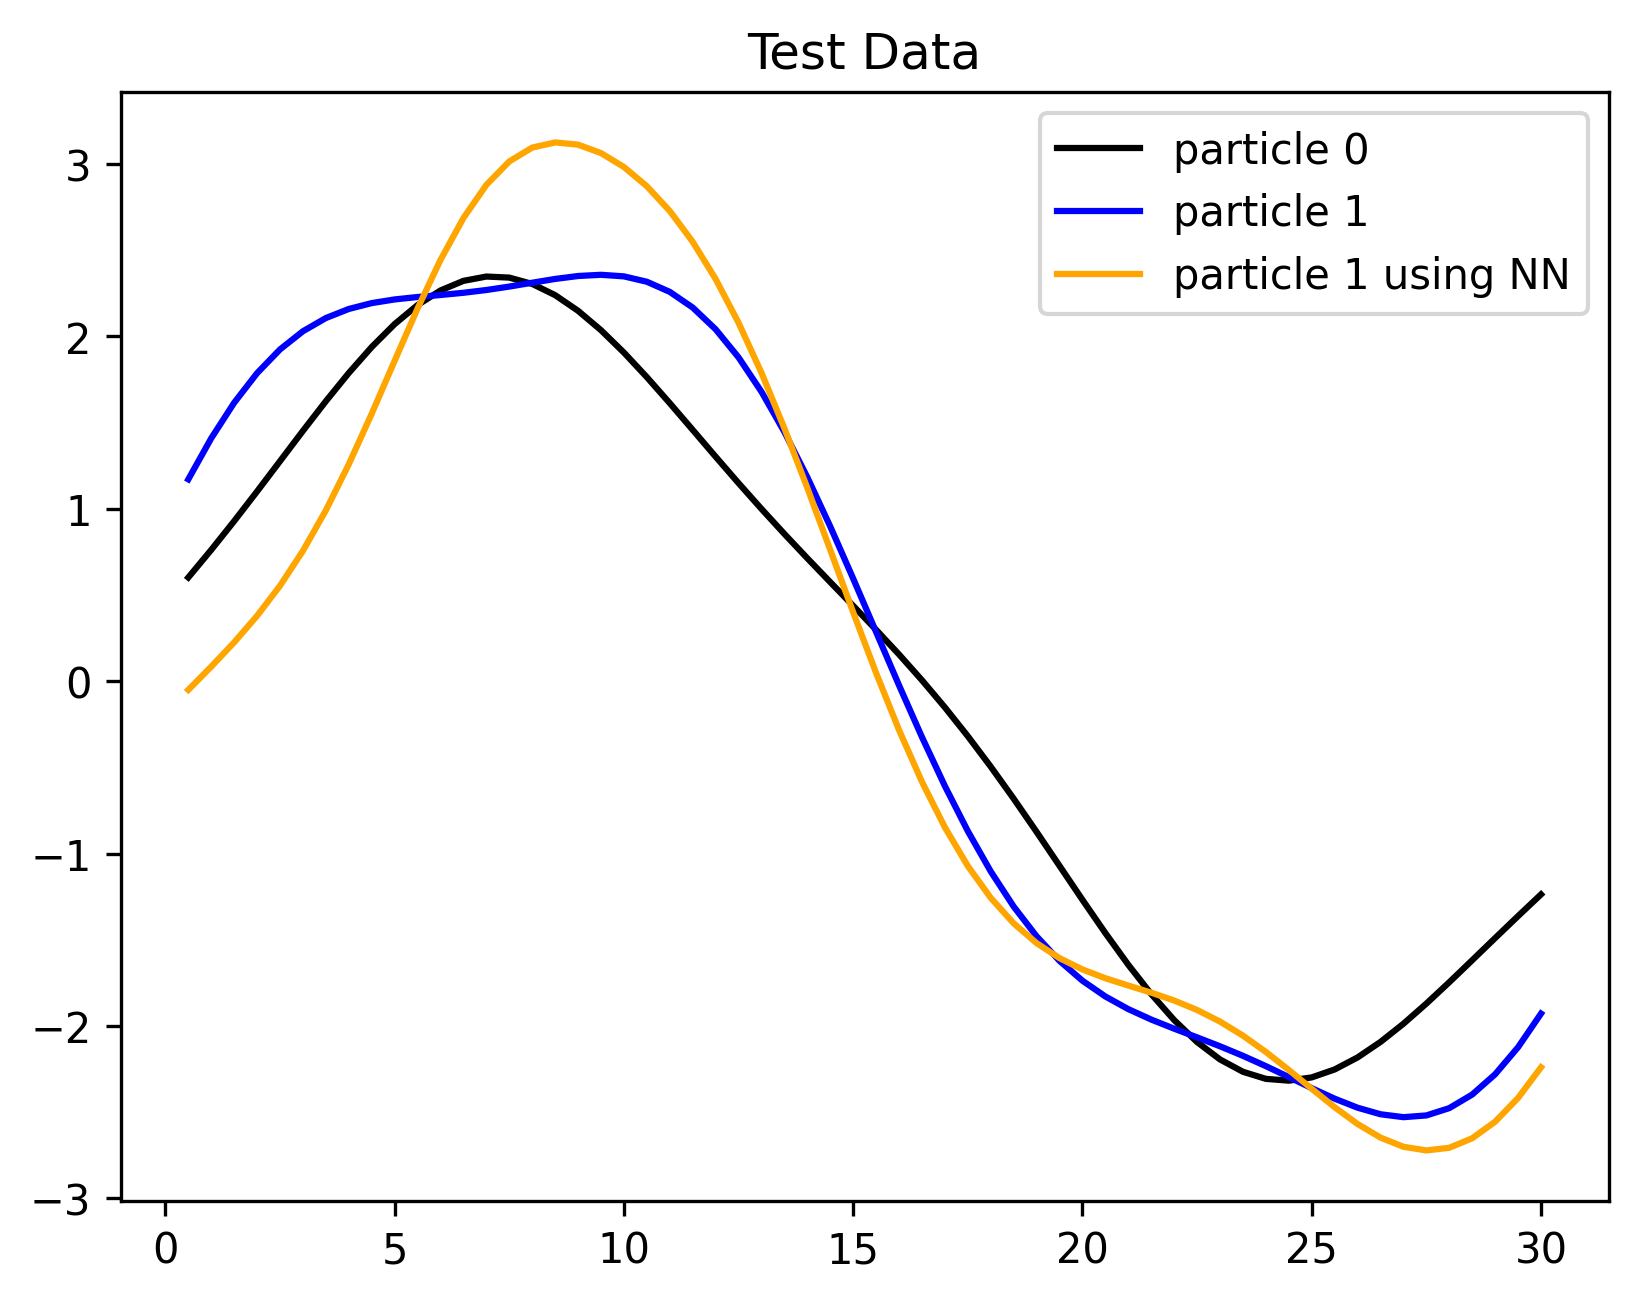

In [ ]:
test_output=Net.predict_on_batch(test_input[:,:,None]) #get some test predictions
plt.plot(ts,test_input[0,:],color="black",label='particle 0') # particle 0
plt.plot(ts,test_correct_output,color="blue",label='particle 1') # particle 1
plt.plot(ts,test_output[0,:,0],color="orange",label='particle 1 using NN') # particle 1
plt.title("Test Data")
plt.legend()
plt.show()

(2, 3, 1, 60)


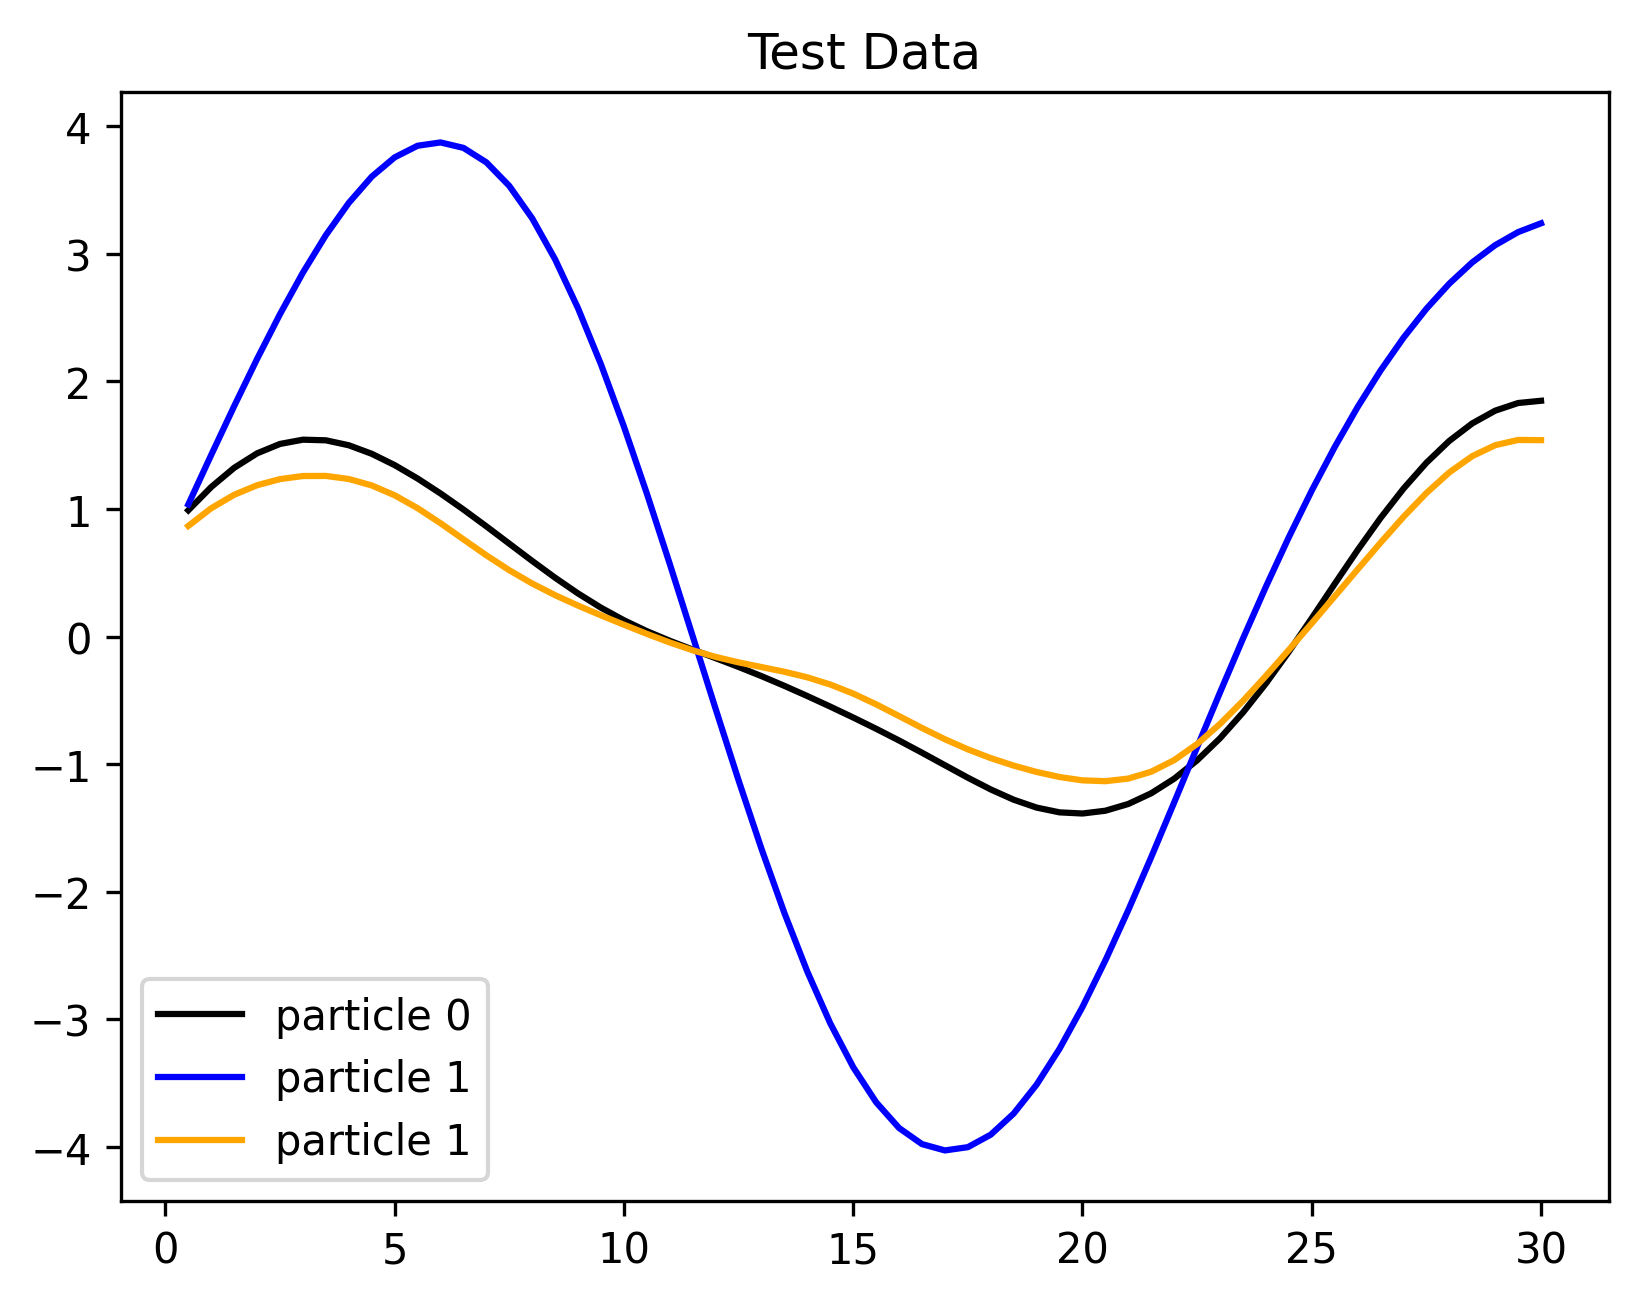

In [ ]:
number_particles=3
k=np.array([0.1,0.0,0.3]) # the spring constants
D=np.array([0.0,0.1,1.0]) # the coupling between j=0 and the rest
m=np.array([2.0,1.0,1.0]) # the masses

#Lets get test data!
#create one batch of test trajectories to compare against!
X0=np.random.rand(2,number_particles,1)
ts,xs=solve(x0=X0,func=multiple_coupled_oscillators_parallel_rhs,T=30.0,n=60)
print(np.shape(xs))
test_input=xs[0,0,:,:]
test_correct_output_1=xs[0,1,0,:]
test_correct_output_2=xs[0,2,0,:]
plt.plot(ts,test_input[0,:],color="black",label='particle 0') # particle 0
plt.plot(ts,test_correct_output_1,color="blue",label='particle 1') # particle 1
plt.plot(ts,test_correct_output_2,color="orange",label='particle 1') # particle 2
plt.title("Test Data")
plt.legend()
plt.show()


(2, 3, 50, 60)
(50, 60, 1)


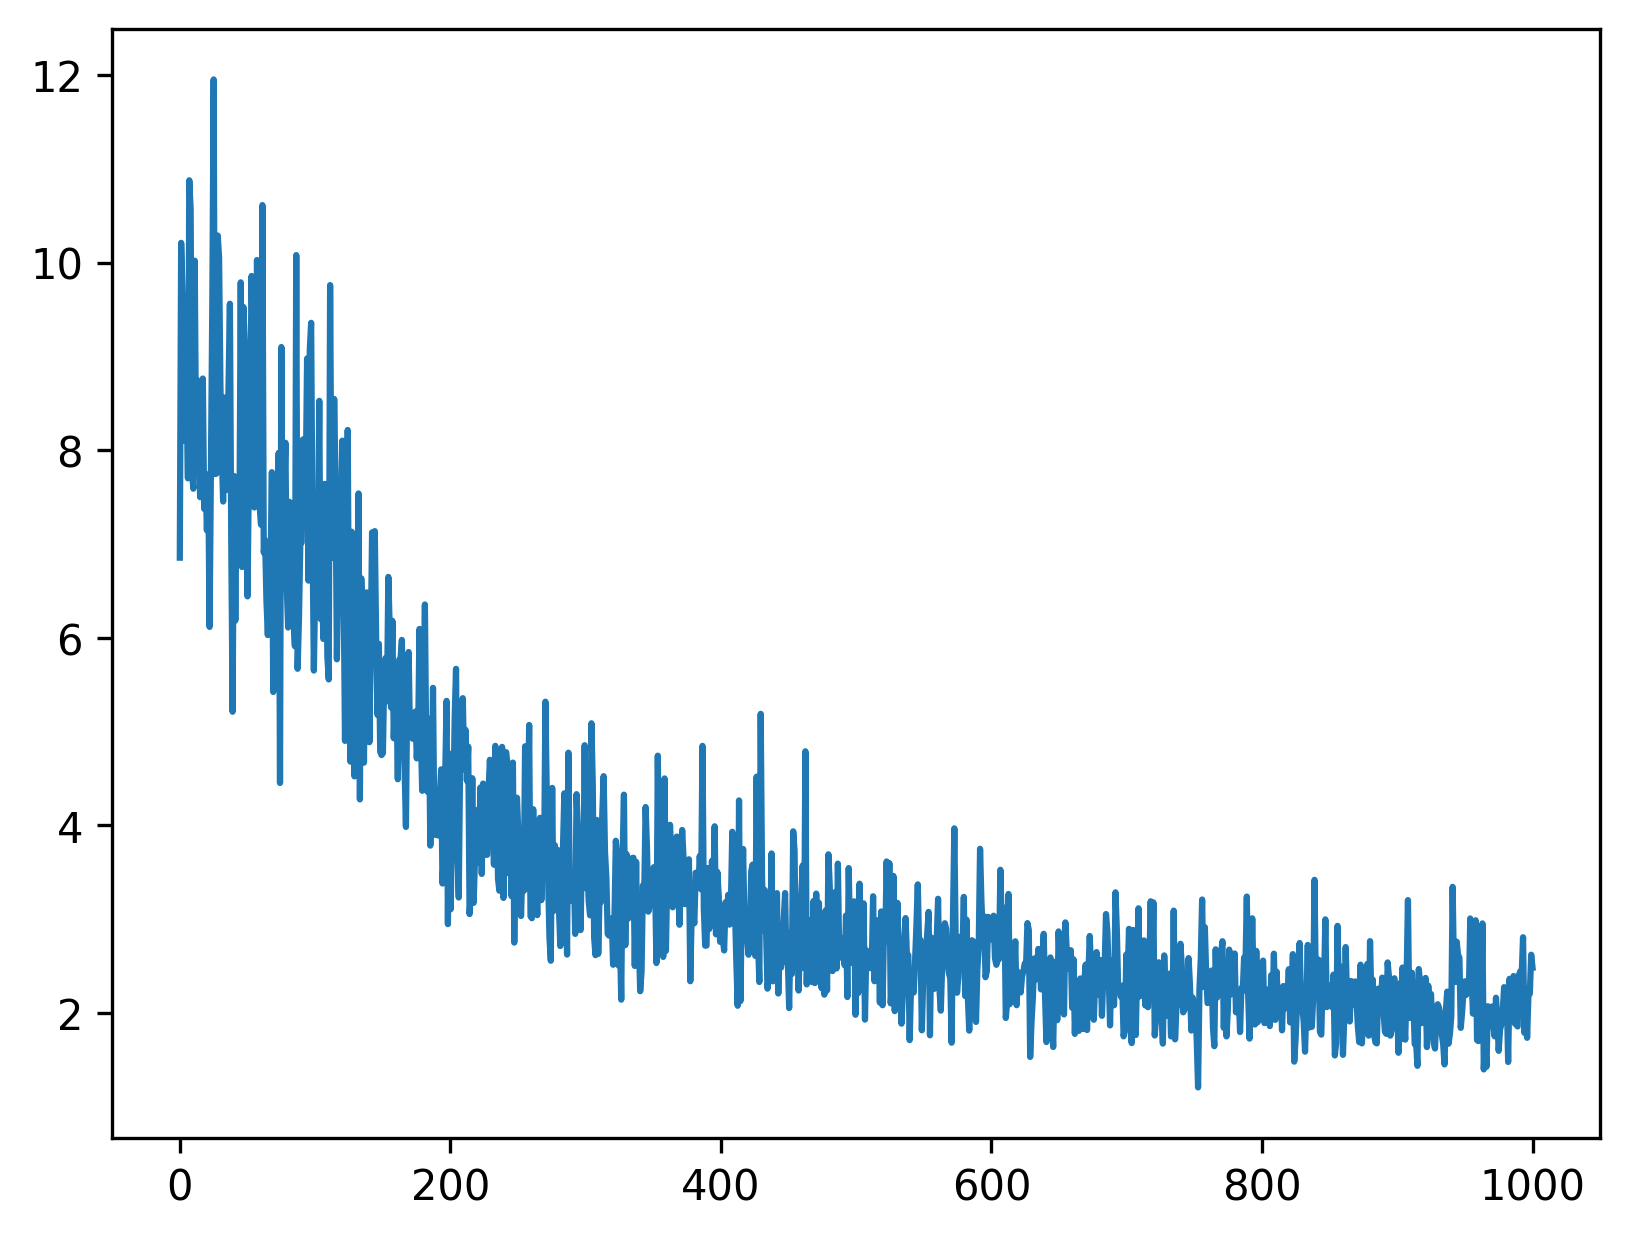

In [ ]:
# Now lets train
training_steps=1000 #number of training steps
batchsize=50 #batchsize
costs=np.zeros(training_steps)
n=60 #number of time steps
T=30.0 #total time interval

skip_steps=10 #plot every ... skip_steps


for j in range(training_steps):
    X0=np.random.randn(2,number_particles,batchsize) # random initial conditions
    ts,xs=solve(x0=X0,func=multiple_coupled_oscillators_parallel_rhs,T=T,n=n) # get solutions
    costs[j]=Net.train_on_batch(xs[0,0,:,:][:,:,None],xs[0,1,:,:][:,:,None]) # train x_0(t)->x_1(t) mapping

print(np.shape(xs))
print(np.shape(xs[0,0,:,:][:,:,None]))
x=np.linspace(0,1000,1000)
plt.plot(x,costs)

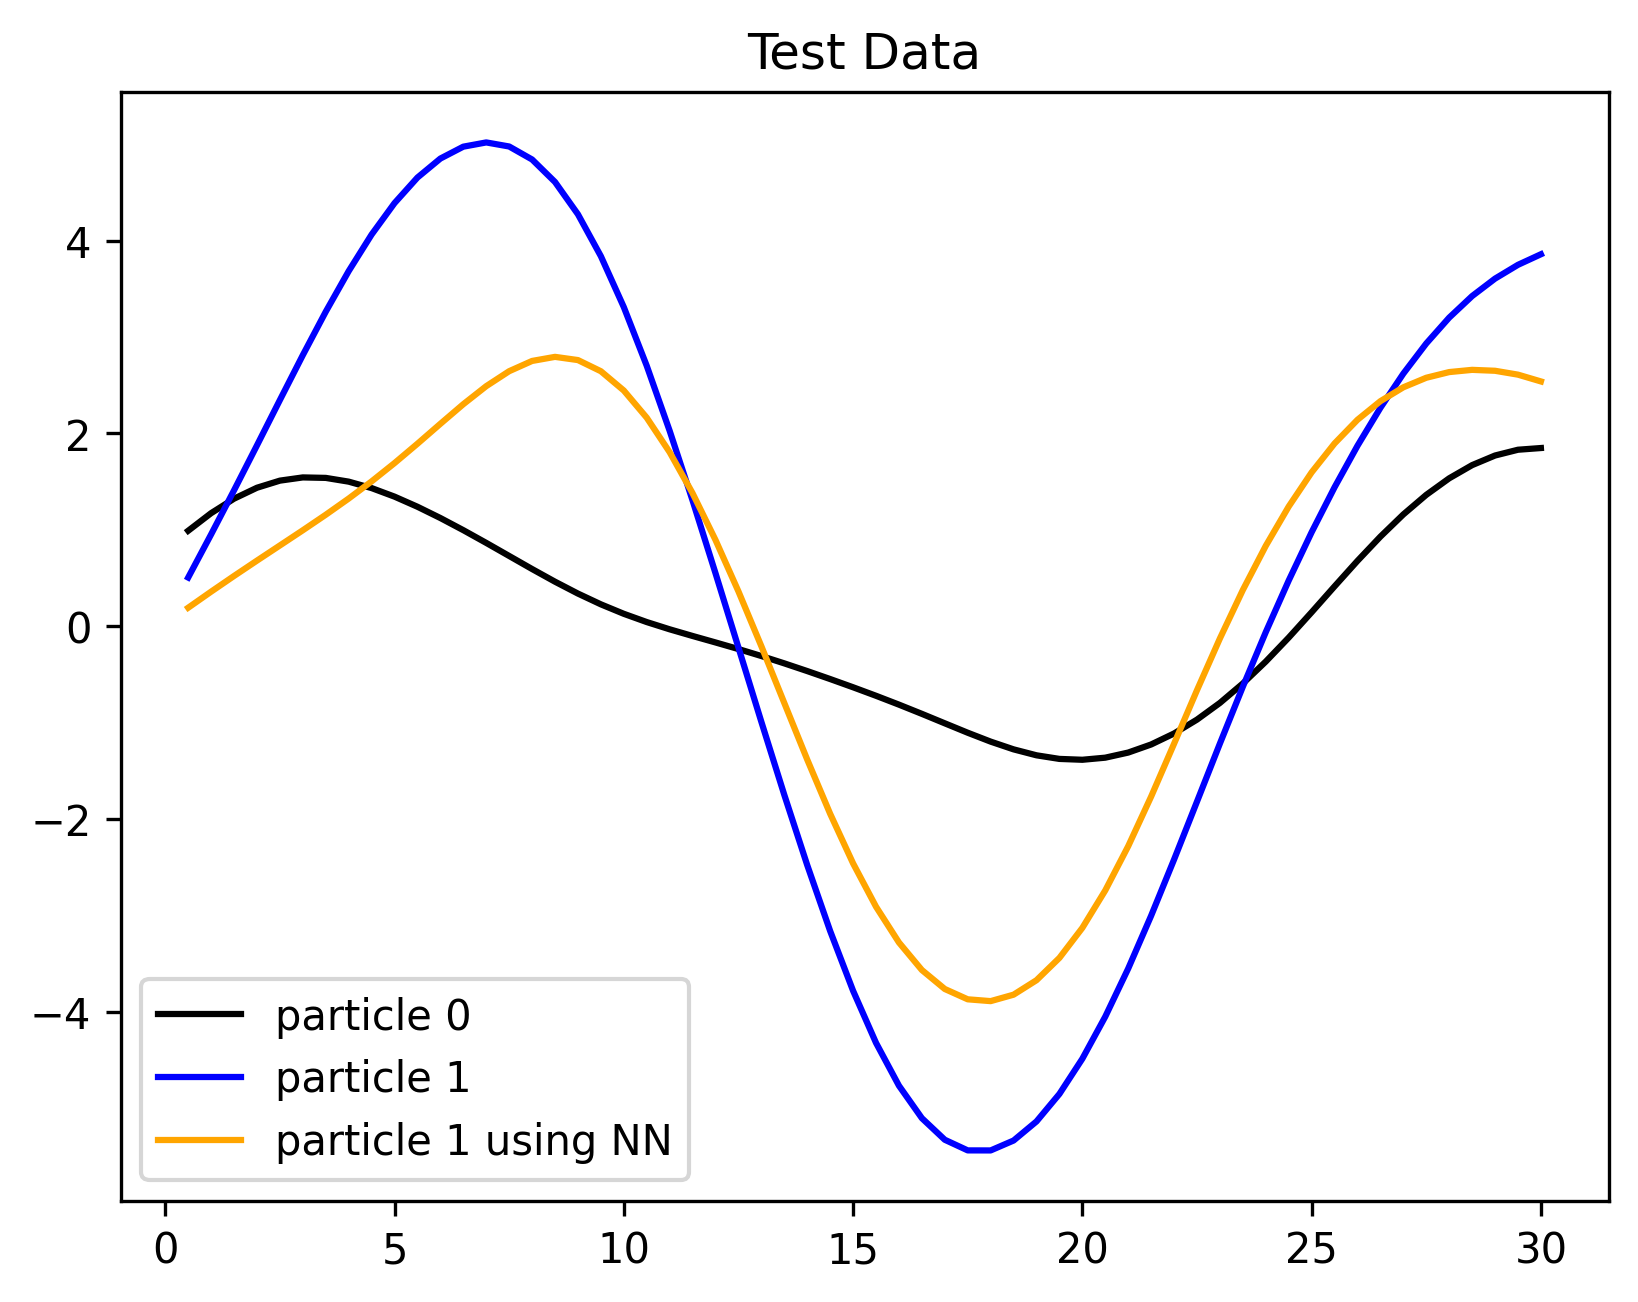

In [ ]:
test_output=Net.predict_on_batch(test_input[:,:,None]) #get some test predictions
plt.plot(ts,test_input[0,:],color="black",label='particle 0') # particle 0
plt.plot(ts,test_correct_output,color="blue",label='particle 1') # particle 1
plt.plot(ts,test_output[0,:,0],color="orange",label='particle 1 using NN') # particle 1
plt.title("Test Data")
plt.legend()
plt.show()

In [ ]:
0